# **Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

In [ ]:
df=pd.read_csv('hypothyroid.csv')
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


## Data Preprocessing

In [ ]:
import pandas as pd

selected_columns = ['age', 'sex', 'pregnant', 'thyroid surgery', 'TSH', 'T3', 'TT4', 'T4U', 'binaryClass']

new_df = df.loc[:, selected_columns]
new_df

,age,sex,pregnant,thyroid surgery,TSH,T3,TT4,T4U,binaryClass
0,41,F,f,f,1.3,2.5,125,1.14,P
1,23,F,f,f,4.1,2,102,?,P
2,46,M,f,f,0.98,?,109,0.91,P
3,70,F,f,f,0.16,1.9,175,?,P
4,70,F,f,f,0.72,1.2,61,0.87,P
...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,?,?,?,?,P
3768,68,F,f,f,1,2.1,124,1.08,P
3769,74,F,f,f,5.1,1.8,112,1.07,P
3770,72,M,f,f,0.7,2,82,0.94,P


In [ ]:
new_df.isnull().sum()

age                0
sex                0
pregnant           0
thyroid surgery    0
TSH                0
T3                 0
TT4                0
T4U                0
binaryClass        0
dtype: int64

In [ ]:
new_df.describe()

,age,sex,pregnant,thyroid surgery,TSH,T3,TT4,T4U,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,288,70,242,147,2
top,59,F,f,f,?,?,?,?,P
freq,95,2480,3719,3719,369,769,231,387,3481


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3772 non-null   object
 1   sex              3772 non-null   object
 2   pregnant         3772 non-null   object
 3   thyroid surgery  3772 non-null   object
 4   TSH              3772 non-null   object
 5   T3               3772 non-null   object
 6   TT4              3772 non-null   object
 7   T4U              3772 non-null   object
 8   binaryClass      3772 non-null   object
dtypes: object(9)
memory usage: 265.3+ KB


In [ ]:
new_df

,age,sex,pregnant,thyroid surgery,TSH,T3,TT4,T4U,binaryClass
0,41,F,f,f,1.3,2.5,125,1.14,P
1,23,F,f,f,4.1,2,102,?,P
2,46,M,f,f,0.98,?,109,0.91,P
3,70,F,f,f,0.16,1.9,175,?,P
4,70,F,f,f,0.72,1.2,61,0.87,P
...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,?,?,?,?,P
3768,68,F,f,f,1,2.1,124,1.08,P
3769,74,F,f,f,5.1,1.8,112,1.07,P
3770,72,M,f,f,0.7,2,82,0.94,P


In [ ]:
new_df["binaryClass"].value_counts()


P    3481
N     291
Name: binaryClass, dtype: int64

In [ ]:
new_df["binaryClass"]=new_df["binaryClass"].map({"P":0,"N":1})

In [ ]:
new_df["pregnant"].value_counts()


f    3719
t      53
Name: pregnant, dtype: int64

In [ ]:
new_df=new_df.replace({'t':1,'f':0})

In [ ]:
new_df

,age,sex,pregnant,thyroid surgery,TSH,T3,TT4,T4U,binaryClass
0,41,F,0,0,1.3,2.5,125,1.14,0
1,23,F,0,0,4.1,2,102,?,0
2,46,M,0,0,0.98,?,109,0.91,0
3,70,F,0,0,0.16,1.9,175,?,0
4,70,F,0,0,0.72,1.2,61,0.87,0
...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,?,?,?,?,0
3768,68,F,0,0,1,2.1,124,1.08,0
3769,74,F,0,0,5.1,1.8,112,1.07,0
3770,72,M,0,0,0.7,2,82,0.94,0


In [ ]:
new_df.isnull().sum()

age                0
sex                0
pregnant           0
thyroid surgery    0
TSH                0
T3                 0
TT4                0
T4U                0
binaryClass        0
dtype: int64

In [ ]:
new_df["sex"].value_counts()

F    2480
M    1142
?     150
Name: sex, dtype: int64

In [ ]:
new_df['sex']=new_df['sex'].replace({"F":1,"M":0})

In [ ]:
new_df["T3"].value_counts()


?      769
2      238
1.8    207
2.2    201
1.9    189
      ... 
6.7      1
7.3      1
4.6      1
5.2      1
6.6      1
Name: T3, Length: 70, dtype: int64

In [ ]:
new_df["binaryClass"].value_counts()


0    3481
1     291
Name: binaryClass, dtype: int64

In [ ]:
new_df.dtypes

age                object
sex                object
pregnant            int64
thyroid surgery     int64
TSH                object
T3                 object
TT4                object
T4U                object
binaryClass         int64
dtype: object

In [ ]:
cols = new_df.columns[new_df.dtypes.eq('object')]
new_df[cols] = new_df[cols].apply(pd.to_numeric, errors='coerce')
new_df.dtypes

age                float64
sex                float64
pregnant             int64
thyroid surgery      int64
TSH                float64
T3                 float64
TT4                float64
T4U                float64
binaryClass          int64
dtype: object

In [ ]:
new_df['sex'].fillna(new_df['sex'].mean(), inplace=True)
new_df['age'].fillna(new_df['age'].mean(), inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [ ]:
new_df['TSH'] = imputer.fit_transform(new_df[['TSH']])
new_df['T3'] = imputer.fit_transform(new_df[['T3']])
new_df['TT4'] = imputer.fit_transform(new_df[['TT4']])
new_df['T4U'] = imputer.fit_transform(new_df[['T4U']])


In [ ]:
new_df.isnull().sum()


age                0
sex                0
pregnant           0
thyroid surgery    0
TSH                0
T3                 0
TT4                0
T4U                0
binaryClass        0
dtype: int64

## **Exploratory data analysis**

<Axes: xlabel='binaryClass', ylabel='count'>

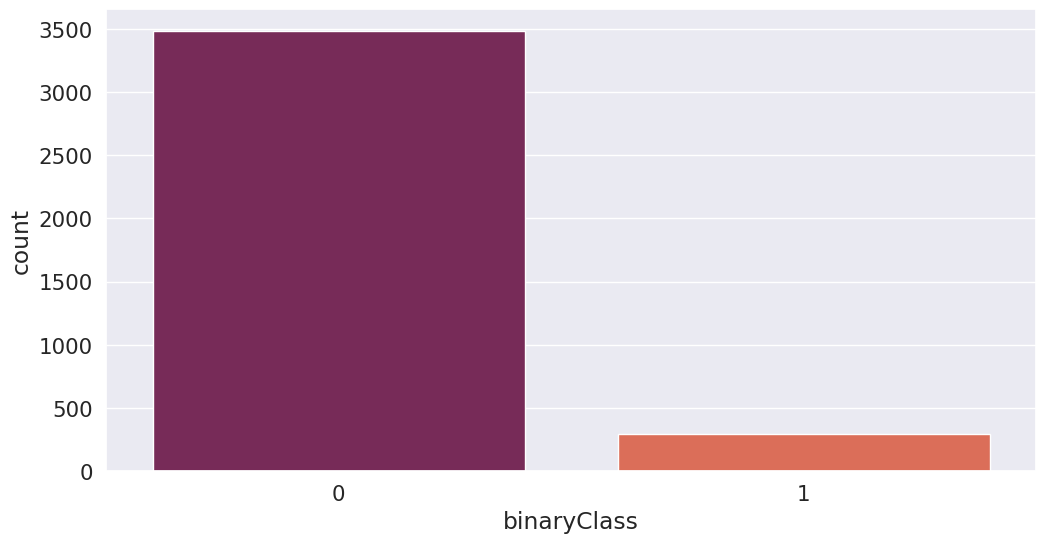

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='binaryClass', data=new_df, palette='rocket')

<Axes: xlabel='binaryClass', ylabel='count'>

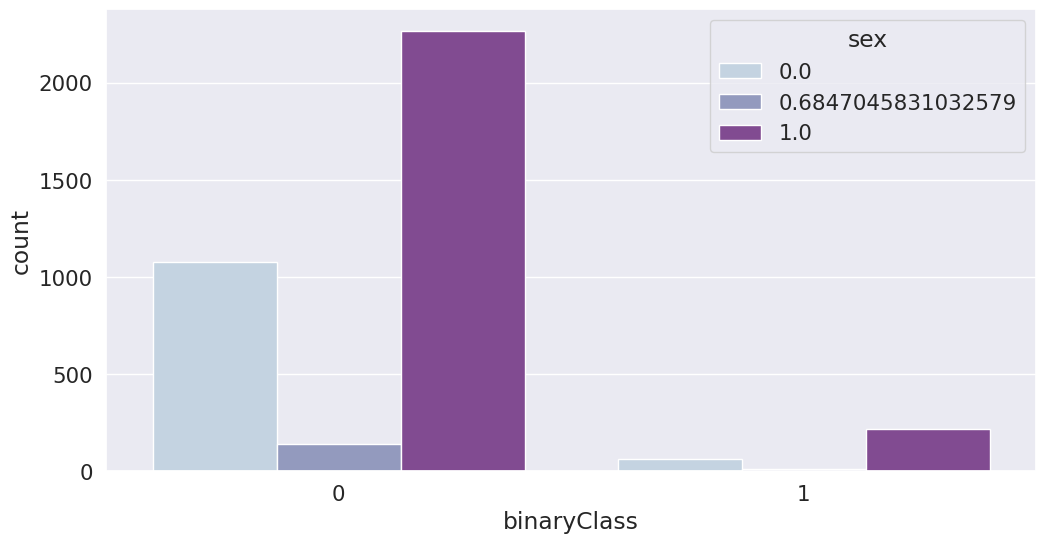

In [ ]:
plt.figure(figsize=(12,6))

sns.countplot(x='binaryClass', data=new_df, hue='sex', palette='BuPu')

In [ ]:
corr = new_df.corr()
corr

,age,sex,pregnant,thyroid surgery,TSH,T3,TT4,T4U,binaryClass
age,1.000000,0.003606,-0.113521,-0.029502,-0.056167,-0.214925,-0.037609,-0.157523,-0.003174
sex,0.003606,1.000000,0.079550,0.036586,0.031808,0.062759,0.166989,0.225572,0.050808
pregnant,-0.113521,0.079550,1.000000,-0.014251,-0.019693,0.181147,0.172490,0.334702,-0.034516
thyroid surgery,-0.029502,0.036586,-0.014251,1.000000,0.026230,-0.024146,-0.021806,0.027922,-0.017633
TSH,-0.056167,0.031808,-0.019693,0.026230,1.000000,-0.147331,-0.261300,0.071028,0.423958
T3,-0.214925,0.062759,0.181147,-0.024146,-0.147331,1.000000,0.509065,0.407242,-0.177683
TT4,-0.037609,0.166989,0.172490,-0.021806,-0.261300,0.509065,1.000000,0.426484,-0.291677
T4U,-0.157523,0.225572,0.334702,0.027922,0.071028,0.407242,0.426484,1.000000,0.028337
binaryClass,-0.003174,0.050808,-0.034516,-0.017633,0.423958,-0.177683,-0.291677,0.028337,1.000000


<Axes: >

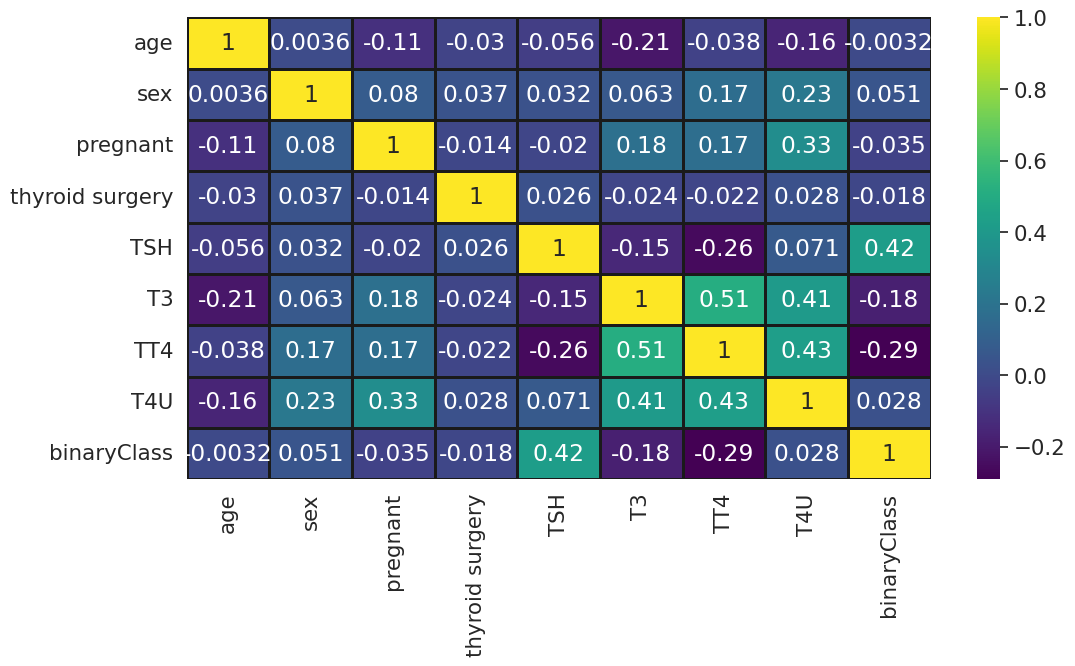

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

In [ ]:
x = new_df.drop('binaryClass', axis=1)
y = new_df['binaryClass']

In [ ]:
x

,age,sex,pregnant,thyroid surgery,TSH,T3,TT4,T4U
0,41.0,1.0,0,0,1.300000,2.5000,125.000000,1.140
1,23.0,1.0,0,0,4.100000,2.0000,102.000000,0.995
2,46.0,0.0,0,0,0.980000,2.0135,109.000000,0.910
3,70.0,1.0,0,0,0.160000,1.9000,175.000000,0.995
4,70.0,1.0,0,0,0.720000,1.2000,61.000000,0.870
...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,5.086766,2.0135,108.319345,0.995
3768,68.0,1.0,0,0,1.000000,2.1000,124.000000,1.080
3769,74.0,1.0,0,0,5.100000,1.8000,112.000000,1.070
3770,72.0,0.0,0,0,0.700000,2.0000,82.000000,0.940


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64

## **training and testing data split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x.shape

(3772, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
x.shape

(3772, 8)

In [ ]:
x.shape[1]

8

In [ ]:
# model = Sequential()
# model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(63, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu')),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        1

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, es], batch_size=64, validation_split=0.1)

Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 0.3593 - accuracy: 0.8775 - val_loss: 0.2060 - val_accuracy: 0.9223 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.9379 - val_loss: 0.1440 - val_accuracy: 0.9435 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1582 - accuracy: 0.9501 - val_loss: 0.1202 - val_accuracy: 0.9541 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9560 - val_loss: 0.0937 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1194 - accuracy: 0.9603 - val_loss: 0.0765 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1029 - accuracy: 0.9635 - val_loss: 0.0653 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0

## **Prediction**

In [ ]:
y_pred = model.predict(x_test)
y_pred

30/30 [==============================] - 0s 2ms/step


array([[3.80387888e-07],
       [1.91861585e-01],
       [2.41277637e-10],
       [2.70147353e-07],
       [5.45599566e-10],
       [3.18575868e-13],
       [4.92039725e-08],
       [1.42768491e-03],
       [1.65480268e-10],
       [5.54770230e-09],
       [4.73327599e-10],
       [2.77774665e-03],
       [6.04355732e-10],
       [9.00622129e-01],
       [1.12824273e-05],
       [6.90736843e-11],
       [1.17686950e-05],
       [3.98385192e-09],
       [8.42916181e-10],
       [4.19683382e-03],
       [1.10165885e-07],
       [1.28694792e-05],
       [5.84752177e-11],
       [2.68757052e-08],
       [1.55106261e-06],
       [7.73008480e-12],
       [6.31043306e-09],
       [8.64668842e-03],
       [6.17420852e-01],
       [5.82800055e-07],
       [4.17291861e-11],
       [1.28362043e-09],
       [1.66021197e-10],
       [6.62106206e-04],
       [4.25233182e-08],
       [5.86502694e-18],
       [3.93156263e-09],
       [1.22002512e-03],
       [1.93191995e-03],
       [7.72224595e-08],


In [ ]:
y_test

270     0
2071    1
3660    0
3207    0
1675    0
       ..
1791    0
2132    0
162     0
1885    0
219     0
Name: binaryClass, Length: 943, dtype: int64

## Accuracy and Loss function **count**

In [ ]:
%%time
model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9756
CPU times: user 129 ms, sys: 5.53 ms, total: 134 ms
Wall time: 132 ms


[0.07417938858270645, 0.9756097793579102]

### Test Accuracy: 97.56%
### Loss Function: 74.17%

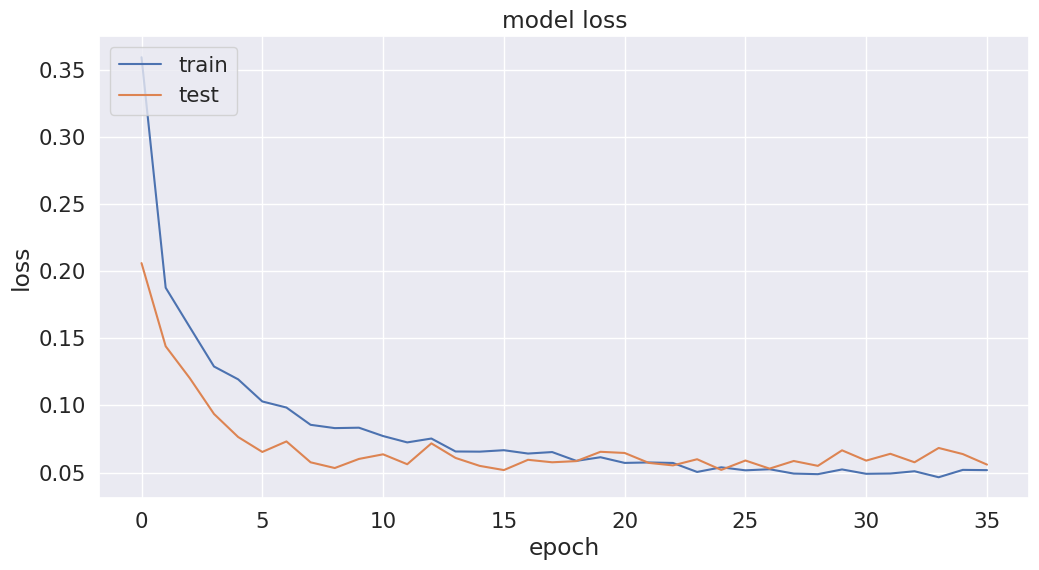

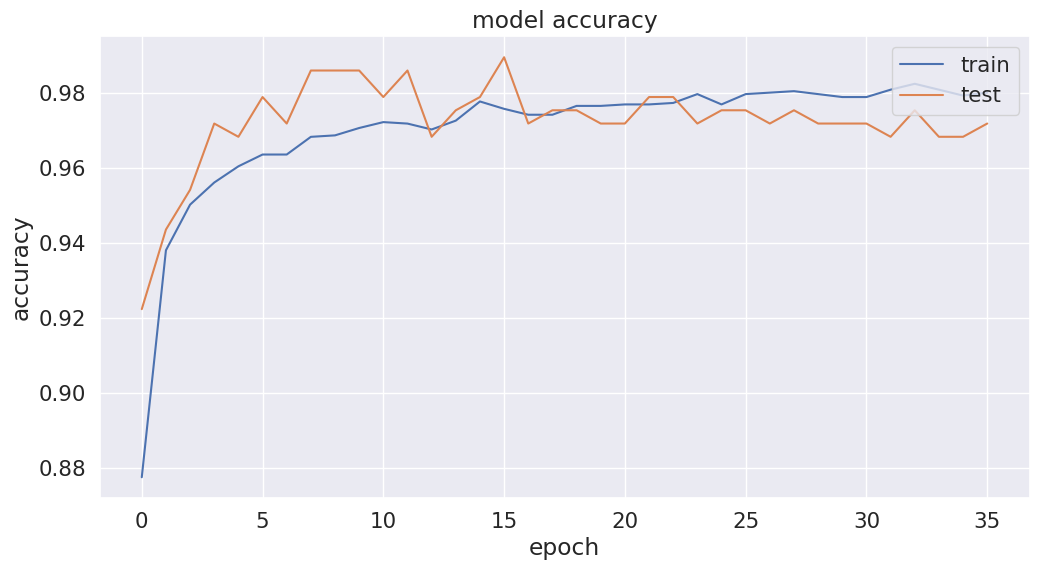

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(12,6))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

30/30 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9756
Test Loss: 0.0742
Test Accuracy: 97.56%
      Actual  Predicted
270        0          0
2071       1          0
3660       0          0
3207       0          0
1675       0          0
1200       0          0
2421       0          0
551        0          0
567        0          0
3322       0          0


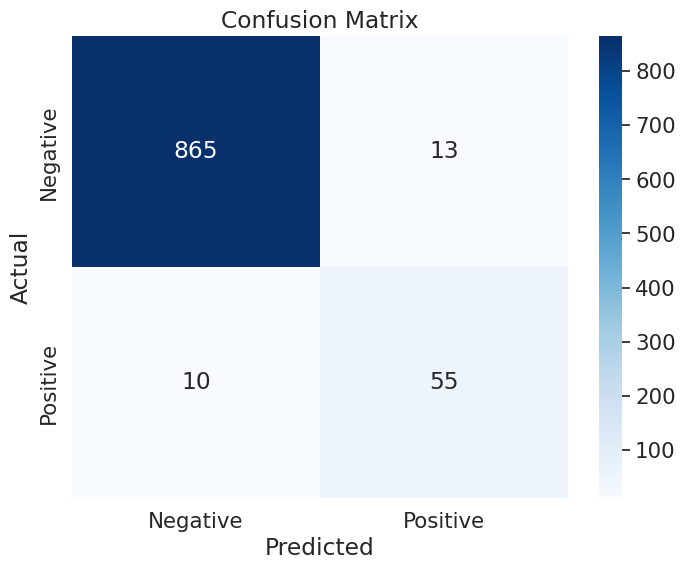

In [ ]:
y_pred = model.predict(x_test)

y_pred_binary = (y_pred > 0.5).astype(int)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary.flatten()})
print(results_df.head(10))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()